# A/B тестирование гипотез 

В компании подготовлен список гипотез для увеличения выручки. Задача проекта - приоритизировать гипотезы, запустить A/B-тест и на основе результатов принять подходящее решение. Первоначальные данные представляют собой 3 таблицы, в которых содержатся данные о  9 гипотезах с оценками приоритетных признаков, данные о  заказах и о пользователях контрольной и тестируемой групп.
Для выполнения задачи проекта сделаем следующее: 
- проверим данные на корректность названия колонок для удобства даьнейшей работы с ними, на соответствие типов данных, на наличие дубликатов, пропусков, аномалий в таблицах;
- двумя методами опеределим, какая гипотеза будет являться наиболее успешной;
- проанализируем результаты проведения А/Б тестирования и посчитаем наиболее важные метрики, такие как, кумулятивная выручка, кумулятивный средний чек, кумулятивное среднее количество заказов на посетителя по группам;
- очистим данные от значений, которые могут исказить результаты;
- выясним, насколько значимыми являются рассматриваемые метрики.  

По результатам  сделаем вывод, необходимо ли продолжать А/Б тестирование или данных достаточно для успешности/неуспешности проведения эксперемента.

## Изучение и предподготовка данных

Предоставлены три таблицы с данными, таблица о 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Таблица о заказах в тестируемых группах с указанием даты и суммы заказа. Таблица с количеством пользователей по датам. Просмотрим данные в таблицах, проверим на соответствие типов данных, проверим есть ли пропуски, аномалии, повторы.

### Изучение общей информации

In [1]:
#открытие библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
print('Библиотеки загружены корректно')

Библиотеки загружены корректно


In [2]:
# данные о гипотезах
hypothesis = pd.read_csv('hypothesis.csv', sep = ',')
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# информация о таблице
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Описание колонок таблицы:  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Таблица состоит из 9 строк и 5 столбцов. В колонках нет пропущенны значений. Названия колонок не соответствуют общепринятому регистру, приведем к необходимому виду в разделе "Переименование столбцов".

In [4]:
# данные о заказах
orders = pd.read_csv('orders.csv', sep = ',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
# информация о заказах
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Описание колонок:  
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.

Таблица состоит из 1197 строк и 5 столбцов. В колонках нет пропущенны значений. Названия колонок не соответствуют общепринятому регистру, приведем к необходимому виду в разделе "Переименование столбцов". Некоторые типы файлов не соответствуют содержанию данных, изменим тип данных в разделе "Изменение типов данных".

In [6]:
visitors = pd.read_csv('visitors.csv', sep = ',')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Описание колонок таблицы:  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

Таблица состоит из 62 строк и 3 столбцов. В колонках нет пропущенных значений. Названия колонок соответствуют общепринятому регистру. Некоторые типы файлов не соответствуют содержанию данных, изменим тип данных в разделе "Изменение типов данных".

### Переименование столбцов

При изучении данных, было обнаружено несоответствие названий колонок общепринятым нормам, исправим это.

In [8]:
# посмотрим на названия колонок
print('Название колонок visitors: ',visitors.columns, end = '\n')
print('Название колонок orders:',orders.columns, end = '\n')
print('Название колонок hypothesis:',hypothesis.columns)

Название колонок visitors:  Index(['date', 'group', 'visitors'], dtype='object')
Название колонок orders: Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
Название колонок hypothesis: Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')


In [9]:
# приведем названия столбцов к 'змеиному' регистру
orders.columns = [j.replace('Id', '_id') for j in orders.columns.values]
hypothesis.columns = [j.lower() for j in hypothesis.columns.values]

In [10]:
# проверим, что все правильно переименовалось
print('Название колонок visitors: ',visitors.columns, end = '\n')
print('Название колонок orders:',orders.columns, end = '\n')
print('Название колонок hypothesis:',hypothesis.columns)

Название колонок visitors:  Index(['date', 'group', 'visitors'], dtype='object')
Название колонок orders: Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')
Название колонок hypothesis: Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


Названия столбцов исправлены на корректные.

### Изменение типов данных

В некоторых таблицах есть данные в виде даты, но тип данных указан object. Изменим тип данных на datetime.

In [11]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'],format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'],format = '%Y-%m-%d')

In [12]:
# проверим, что данные изменились корректно
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
# проверим, что данные изменились корректно
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Названия столбцов исправлены на корректные.

### Поиск дубликатов

In [14]:
print('Количество дубликатов в visitors:', visitors.duplicated().sum())
print('Количество дубликатов в orders:', orders.duplicated().sum())
print('Количество дубликатов в hypothesis:', hypothesis.duplicated().sum())

Количество дубликатов в visitors: 0
Количество дубликатов в orders: 0
Количество дубликатов в hypothesis: 0


Дубликатов не обнаружено.

### Поиск аномальных значений

Для того, чтобы понять есть ли аномальные значения, надо проверить уникальные значения каждого столбца.

In [15]:
#создадим функцию вывода уникальных значений каждого столбца
def unique_in_column (data):
    for column in data.columns:
        print('Уникальные значения в столбце', column)
        print(data.sort_values(by = column)[column].unique())

In [16]:
unique_in_column(visitors)

Уникальные значения в столбце date
['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-18T00:00:00.000000000'
 '2019-08-19T00:00:00.000000000' '2019-08-20T00:00:00.000000000'
 '2019-08-21T00:00:00.000000000' '2019-08-22T00:00:00.000000000'
 '2019-08-23T00:00:00.000000000' '2019-08-24T00:00:00.000000000'
 '2019-08-25T00:00:00.000000000' '2019-08-26T00:00:00.000000000'
 '2019-08-27T00:00:00.000000000' '2019-08-28T00:00:00.000000000'
 '2019-08-29T00:00:00.000000000' '2019-08-30T00:00:00.0

In [17]:
unique_in_column(orders)

Уникальные значения в столбце transaction_id
[   1062393    4919758    7210578 ... 4281129020 4288552432 4293855558]
Уникальные значения в столбце visitor_id
[   5114589    6958315    8300375 ... 4279090005 4281247801 4283872382]
Уникальные значения в столбце date
['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-18T00:00:00.000000000'
 '2019-08-19T00:00:00.000000000' '2019-08-20T00:00:00.000000000'
 '2019-08-21T00:00:00.000000000' '2019-08-22T00:00:00.000000000'
 '2019-08-23T00:00:0

In [18]:
unique_in_column(hypothesis)

Уникальные значения в столбце hypothesis
['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию']
Уникальные значения в столбце reach
[ 1  2  3  5  8 10]
Уникальные значения в столбце impact
[ 1  2  3  5  7  9 10]
Уникальны

Аномальных значений в данных не обнаружено.

### Дополнительные исследования

Посчитаем, сколько пользователей собралось в каждой группе.

In [19]:
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

В группе B пользователей немного больше, чем в группе A.

Проверим, не попали ли некоторые пользователи в обе тестируемые группы.

In [20]:
# сгруппируем по уникальным идентификаторам пользователей и кол-во групп, в которых они упоминаются
double = orders[['visitor_id', 'group']].drop_duplicates()\
                                        .sort_values(by='visitor_id')\
                                        .groupby('visitor_id')\
                                        .nunique('group')\
                                        .reset_index()
double.head()

,visitor_id,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [21]:
# посчитаем кол-во идентификаторов, которые попали в две группы
print(len(double.query('group != 1')))

58


Итак, каким-то образом 58 пользователей попали в обе группы. Для того, чтобы группы были равнозначны и повторяющиеся пользователи не исказили результаты тестирование, удалим их.

In [22]:
double_visitors = list(double.query('group == 1')['visitor_id'])
orders = orders.query('visitor_id in @double_visitors')
len(orders)

1016

Осталось 1016 пользователей.

Исследуем динамику посетителей по дням по группам.

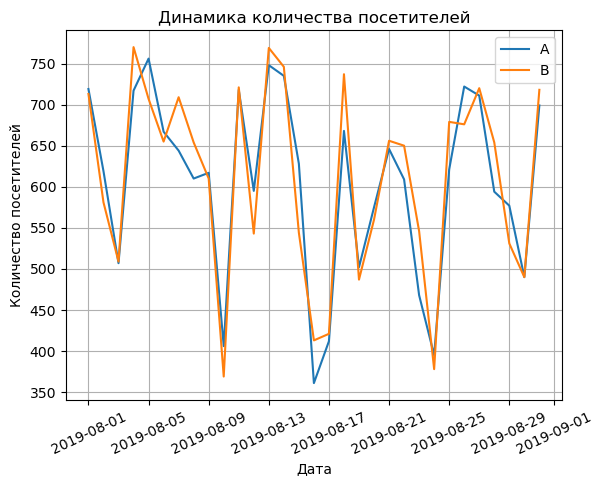

In [23]:
plt.plot(visitors.query('group == "A"')['date'], visitors.query('group == "A"')['visitors'], label='A')
plt.plot(visitors.query('group == "B"')['date'], visitors.query('group == "B"')['visitors'], label='B')
plt.xticks(rotation = 25)
plt.title('Динамика количества посетителей')
plt.grid(visible=True)
plt.xlabel('Дата')
plt.ylabel('Количество посетителей')
plt.legend();

По графику видим, что динамика количества посетителей в обеих группах примерно одинаковая.

### Выводы

Были изучены три предоставленных датасета. Данные содержат информацию о гипотезах с оцененными параметрами охвата, влияния, уверенности и затрат, данные о пользователях, о количестве и сумме заказов в тестируемой и контрольной группе. 

Для дальнейшей работы данные были подготовлены следующим образом:

- земенены названия колонок в соответствии с общепринятыми договоренностями;  
- типы данных в виде даты были изменены с вещественного типа на тип 'дата';  
- дубликатов, пропусков и аномалий не выявлено;
-  удалены пользователи, которые попали в обе группы.

Таблицы `orders` и `visitors` содержат данные за период с 01.08.2020 по 30.08.2020. Пользователи поделены на две группы - А и В. Количество пользователей в группах незначительно отличается. Динамика количества пользователей каждый день похожа в обеих группах.    

С подготовленными данными можно проводить дальнейший анализ.

## Приоритезация гипотез

### Метод ICE для приоритизации гипотез

Применим фреймворк ICE для приоритизации гипотез.

In [24]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
round(hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False), 2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методу ICE приоритетными гипотезами стали 8, 0 и 7.

### Метод RICE для приоритизации гипотез

Применим фреймворк RICE для приоритизации гипотез.

In [25]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методу RICE приоритетными гипотезами стали 7, 2, 0 и 6.

### Выводы

По методу ICE самыми приоритетными являются гипотезы под номерами 8, 0 и 7. Эти гипотезы попали в тройку лидеров, т.к. у них самые высокие оценки вовлечения пользователей и уверенности, что это повлияет на увеличение выручки при относительно небольших затратах. В методе  RICE приоритет гипотез изменился, т.к. добавился показатель охвата пользователей, и в лидеры выбились гипотезы под номерами 7, 2, 0, 6. Но в обоих случаях в лидерах гипотезы под номерами 0 и 7:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  

Стоит их принять во внимание.

## Анализ A/B-теста

### Кумулятивная выручка по группам.

Посмотрим, как менялась кумулятивная выручка по группам.

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [27]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [28]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [29]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.head()

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [30]:
# присвоим столбцам cumulativeData названия 
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Проверим, корректно ли создан файл, совпадают ли даты с датами в первоначальных данных.

In [31]:
print(min(cumulativeData['date']))
print(max(cumulativeData['date']))

2019-08-01 00:00:00
2019-08-31 00:00:00


В файле корректный период.

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
display(cumulativeRevenueA.head())
cumulativeRevenueB.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


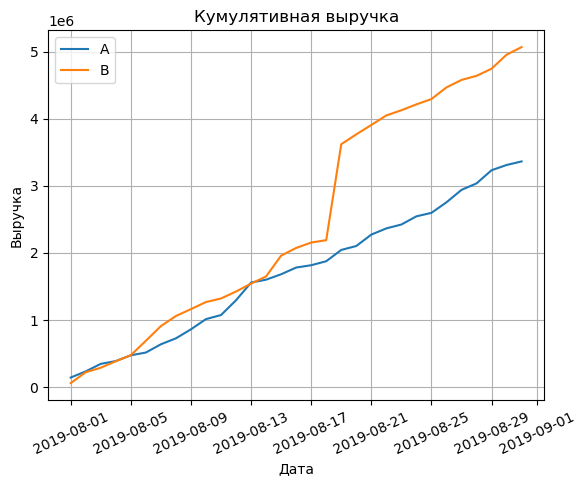

In [33]:
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 25)
plt.title('Кумулятивная выручка')
plt.grid(visible=True)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

Первые 5 дней в тестовом периоде кумулятивная выручка в обеих группах шла на одном уровне. Далее выручка в группе B стала больше а после 17 дня произошел резкий всплеск. Возможно, увеличилось число заказов или появились неожиданно дорогие заказы.

### Кумулятивный средний чек по группам.


Построим график кумулятивного среднего чека по группам. 

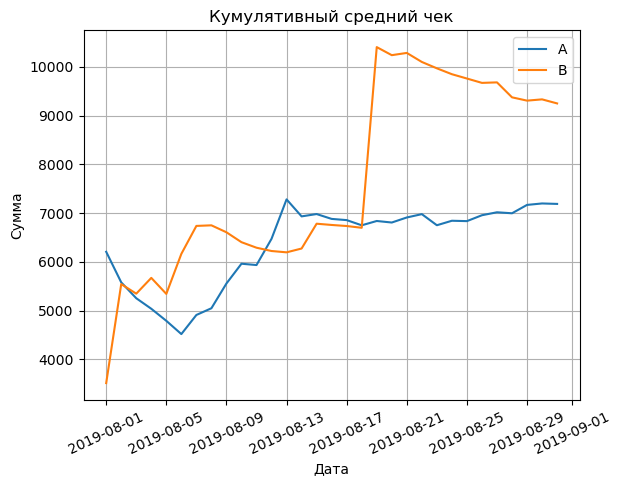

In [34]:
# строим график
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 25)
plt.title('Кумулятивный средний чек')
plt.grid(visible=True)
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend();

По графику видно, что кумулятивный средний чек в группе B резко подскочил после 17 дня проведения теста, а потом пошел на снижение.В целом видно, что средний чек в группе B чаще всего выше, чем в группе A. Это связано с повышением выручки, которая была проанализирована выше.

### Относительное изменение кумулятивного среднего чека группы B к группе A


Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

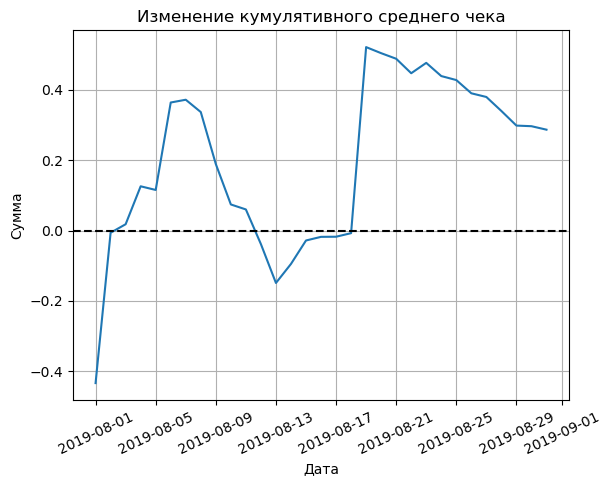

In [35]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
                                                   left_on='date', \
                                                   right_on='date', \
                                                   how='left', \
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/\
          mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/\
          mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation = 25)
plt.title('Изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.grid(visible=True);

График показывает отношение средних чеков в обеих группах. И снова видим резкий прирост после 17 августа. Все три графика в этот день показывают скачок в данных, был очень крупный заказ в этот день.

### Кумулятивное среднее количество заказов на посетителя по группам


Построим график кумулятивного среднего количества заказов на посетителя по группам. Этот параметр отражает конверсия.

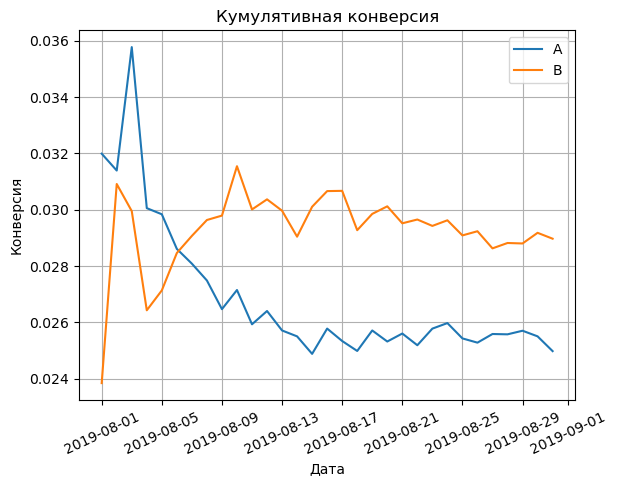

In [36]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation = 25)
plt.grid(visible=True);

По графику хорошо видно, что после 6-го августа конверсия в группе B стала выше и держалась в лидерах до конца теста, а в это же время конверсия в группе А резко снизилась и держалась до конце периода около значения 0.3.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A


Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

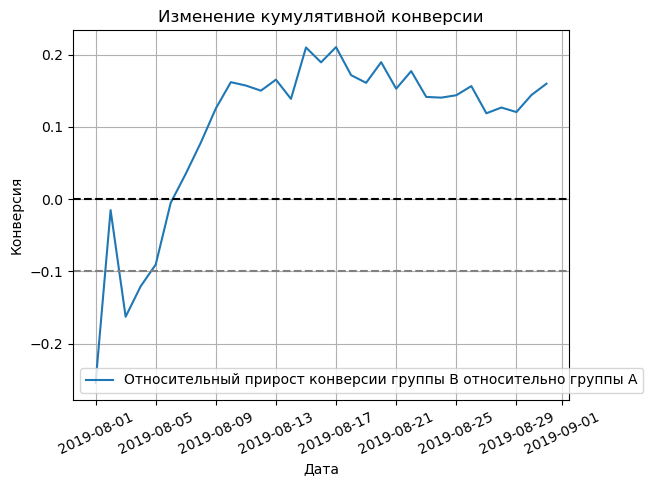

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
    .merge(cumulativeDataB[['date','conversion']], \
           left_on='date', \
           right_on='date', \
           how='left', \
           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, \
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])
plt.title('Изменение кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation = 25)
plt.grid(visible=True);

Положительный прирост конверсии в группе B относительно группы A очевиден после 5-го августа. Однако, в середине периода этот прирост начал понемногу снижаться.

### Количество заказов по пользователям


Построим точечный график количества заказов по пользователям. 

In [38]:
# количество заказов по пользователям 
ordersByUsers = (orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))
ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


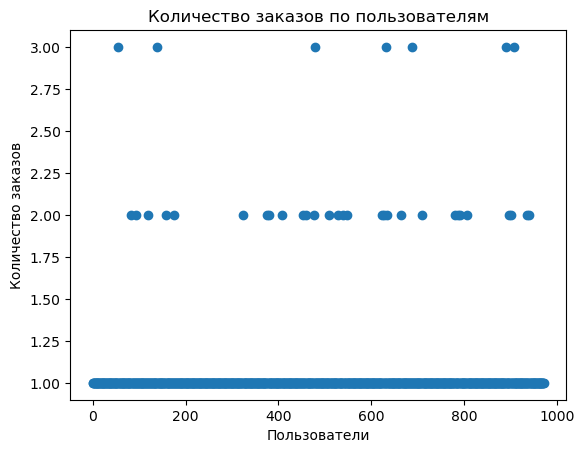

In [39]:
# построим диаграмму
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

Сплошная линия внизу графика говорит о том, что большинство пользователей делали один заказ. Некоторые клиенты оформляли и второй заказ. Единичиные случаи, когда клиенты делали более трех заказов. Максимальное количество заказов составляет 11, таких случая зарегистрировано всего 2.

### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [40]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Менее 1% пользователей сделали более 2х заказов. Значения выше этого стоит отсечь, как аномальные.

### Распределение стоимостей заказов


Постройте точечный график стоимостей заказов.

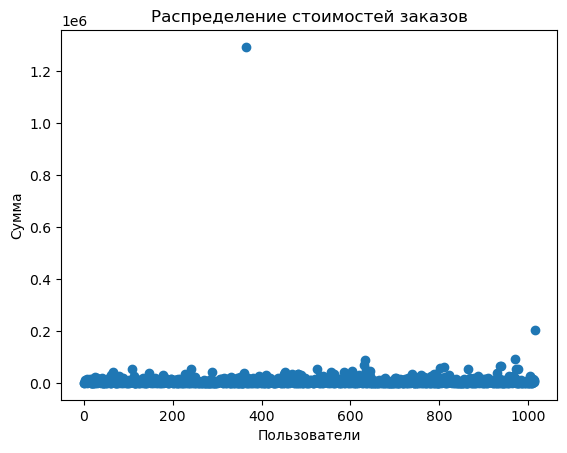

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма');

Посмотрим поближе нижнюю часть графика, где видно большое скопление значений.

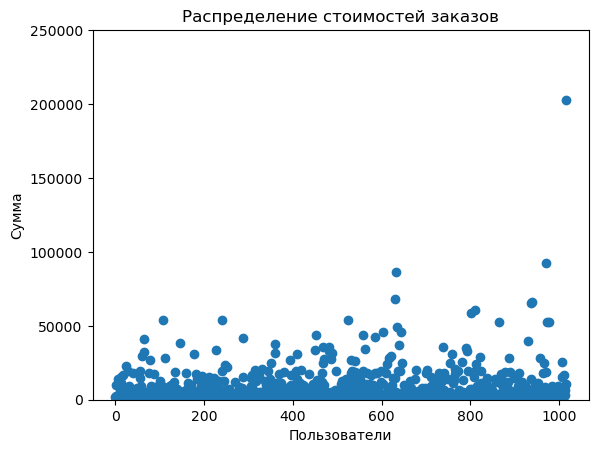

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 250000])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма');

Большая часть заказов совершена на сумму до 100000. На графиках виден выбивающийся заказ с аномально большой суммой более 1200000.

### 95-й и 99-й перцентили стоимости заказов.


Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [43]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Менее 1% заказов совершено на сумму более 53904. Аномальные значение выше этого порога стоит удалить, т.к. они будут влиять на результативные показатели.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [44]:
# сделаем таблицу с количеством пользователей, заказов и сумме заказов в каждой из групп. Добавим расчет с нарастанием.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Описание колонок:  
`date` — дата;  
`ordersPerDateA` — количество заказов в выбранную дату в группе A;  
`revenuePerDateA` — суммарная выручка в выбранную дату в группе A;  
`ordersPerDateB` — количество заказов в выбранную дату в группе B;  
`revenuePerDateB` — суммарная выручка в выбранную дату в группе B;  
`ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;  
`revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;  
`ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;  
`revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;  
`visitorsPerDateA` — количество пользователей в выбранную дату в группе A;  
`visitorsPerDateB` — количество пользователей в выбранную дату в группе B;  
`visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;  
`visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [45]:
# создадим переменные, в которых указаны пользователи, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [46]:
# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                               name='orders')],axis=0)

Проверим гипотезы, что число заказов в группах равны.

H_0: Число заказов пользователей группы A = числу заказов пользователей группы B  
H_a: Число заказов пользователей группы A ≠ числу заказов пользователей группы B

Установим значение уровня значимости: alpha = 0.05.

In [47]:
# вызовем метод для проверки гипотезы
pvalue_orders = round(stats.mannwhitneyu(sampleA, sampleB)[1],3)

print('p_value:', pvalue_orders)

#значение уровня значимости
alpha = 0.05

if pvalue_orders < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p_value: 0.011
Отвергаем нулевую гипотезу


In [48]:
# посчитаем отношение среднего количество заказов в группах
relation_orders = sampleB.mean() / sampleA.mean() - 1  
print('Отношение среднего количество заказов в группах:', f"{relation_orders:.2%}")

Отношение среднего количество заказов в группах: 15.98%


По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен ~16% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проверим гипотезы, что средние чеки в группах равны.

H_0: Средний чек группы A = средний чек группы B  
H_a: Средний группы A ≠ средний чек группы B

Установим значение уровня значимости: alpha = 0.05.

In [49]:
# вызовем метод для проверки гипотезы
pvalue_check = round((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]),3)

print('p_value:', pvalue_check)

#значение уровня значимости
alpha = 0.05

if pvalue_check < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p_value: 0.829
Не получилось отвергнуть нулевую гипотезу


In [50]:
# посчитаем отношение средних чеков в группах
relation_check = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print('Отношение средних чеков в группах:', f"{relation_check:.2%}")

Отношение средних чеков в группах: 28.66%


P-value значительно больше 0.05. Значит, статистически значимых отличий в среднем чеке между группами нет. поскольку относительное различие среднего чека между сегментами составляет ~29%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

На основе предыдущих расчетов были расчитаны выбивающиеся значения в количестве заказов каждого пользователя и в стомости заказов, которые совершили менее, чем 1% пользователей. Очистим данные от аномальных значений.

In [51]:
# Сделаем срезы пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 99))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 99))]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], 99))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Узнаем, сколько всего аномальных пользователей атрибутом shape.
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
16


Всего 16 человек. Узнаем, как их действия повлияли на результаты теста.  
Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [52]:
# Подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим гипотезы, что число заказов в группах равны.

H_0: Число заказов пользователей группы A = числу заказов пользователей группы B  
H_a: Число заказов пользователей группы A ≠ числу заказов пользователей группы B

Установим значение уровня значимости: alpha = 0.05.

In [53]:
# вызовем метод для проверки гипотезы
pvalue_orders_good = round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],3)

print('p_value:', pvalue_orders_good)

#значение уровня значимости
alpha = 0.05

if pvalue_orders_good < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p_value: 0.007
Отвергаем нулевую гипотезу


In [54]:
# посчитаем отношение среднего количество заказов в группах
relation_orders_good = (sampleBFiltered.mean()/sampleAFiltered.mean()-1) 
print('Отношение среднего количество заказов в группах:', f"{relation_orders_good:.2%}")

Отношение среднего количество заказов в группах: 18.92%


Как и в случае с сырыми данными, статистическая значимость достигнута. Группа B значительно лучше группы A.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [55]:
pvalue_check_good = round(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] ,3)
print('p-value:', pvalue_check_good)

p-value: 0.788


In [56]:

relation_check_good = \
        orders[\
            np.logical_and(\
                orders['group'] == 'B',\
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),\
            )\
        ]['revenue'].mean()\
        / orders[\
            np.logical_and(\
                orders['group'] == 'A',\
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),\
            )\
        ]['revenue'].mean()\
        - 1
print('Отношение средих чеков:',f"{relation_check_good:.2%}")

Отношение средих чеков: -3.23%


p-value немного изменился, но все равно выше уровня критической значимости. А разница между группами B и A стала отрицательной.

### Выводы

In [57]:
# сделаем для наглядности табличку с данными:
tab = pd.DataFrame({'Показатель':['p-value','отношение B к A'],\
                  'Cырые заказы': [pvalue_orders, f"{relation_orders:.2%}"],\
                  'Очищенные заказы': [pvalue_orders_good, f"{relation_orders_good:.2%}"],\
                  'Сырой средний чек': [pvalue_check, f"{relation_check:.2%}"],\
                  'Очищенный средний чек': [pvalue_check_good, f"{relation_check_good:.2%}"]})
tab

,Показатель,Cырые заказы,Очищенные заказы,Сырой средний чек,Очищенный средний чек
0,p-value,0.011,0.007,0.829,0.788
1,отношение B к A,15.98%,18.92%,28.66%,-3.23%


Графики кумулятивных показателей выручки и среднего чека показывают одну картину: после 15 дня группа B лидирует, а также наблюдается всплеск 18 августа, который, возможно, и повлиял на улучшения результатов. Лучшую конверсию показала группа B, тогда как в группе A она постепенно снижалась и до конца эксперемента оставалась низкой.  
Было вычислено, что больше двух заказов на пользователя является аномальным событием. А стоимость заказа в 99% случаев не превышала 58233.2.  

Статистически значимые различия есть по среднему чеку, но нет по конверсии. Однако, после очищения данных количество заказов в группе B улучшилось на ~3 процентных пункта по отношению к количеству заказов группы А. После удаления аномальных значений отношение среднего чека в группе B к группе А снизилось с 28.66% до -3.23%. Это говорит о том, что удаленные аномальные значение серьезно повлияли на средний чек.

## Общий вывод

Были изучены датасеты интернет-магазина, данные которых содержат информацию о гипотезах с оцененными параметрами охвата, влияния, уверенности и затрат, данные о пользователях, о количестве и сумме заказов в тестируемой и контрольной группе. 

На этапе предобработки данных переименованы столбцы, изменены типы данных, произвелся поиск дубликатов, аномалий.

Двумя методами было выяснено, что наиболее важными гипотезами являются следующие:  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

На основе анализа были сделаны следующие выводы:

Посчитаны кумулятивные показатели и статистические значимости количества заказов на пользователя и среднего чека.  

На основе изученных данных можно сделать следующие выводы:
- Есть статистически значимое различие по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по конверсии между группами как по сырым данным, так и после фильтрации.
- Конверсия в группе B держалась стабильно выше конверсии группы A.  
- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

В целом эксперемент можно остановить и признать успешным, т.к. группа B показала лучшие результаты относительно группы А.